In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

sns.set()

In [36]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
data.isna().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [38]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [40]:
num_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

<bound method Figure.tight_layout of <Figure size 1080x2160 with 14 Axes>>

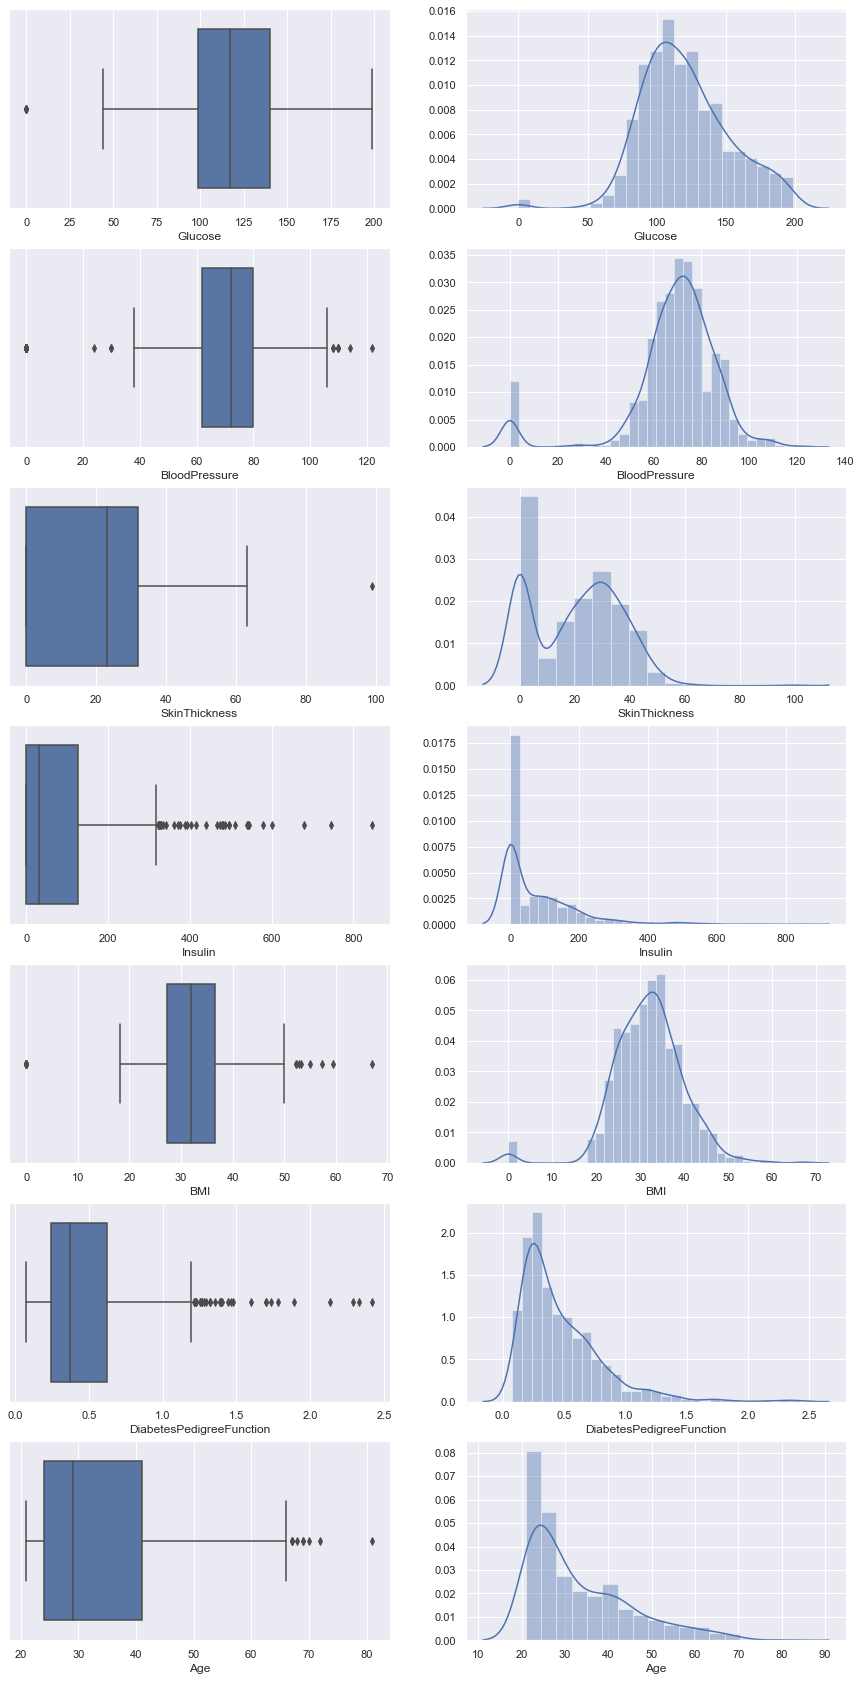

In [41]:
fig, axes = plt.subplots(7,2, figsize=(15,30))

for i, col in enumerate(num_columns):
    sns.boxplot(data[col], ax=axes[i,0])
    sns.distplot(data[col], ax=axes[i,1])
    
fig.tight_layout

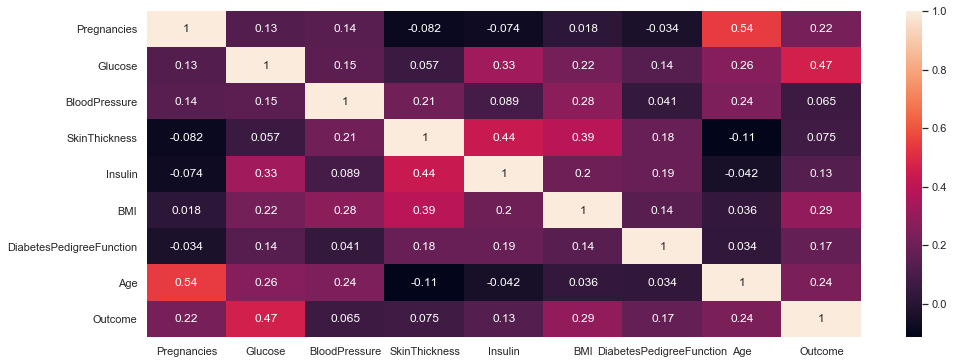

In [42]:
plt.figure(figsize = (16,6))

sns.heatmap(data.corr(), annot = True)

In [43]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

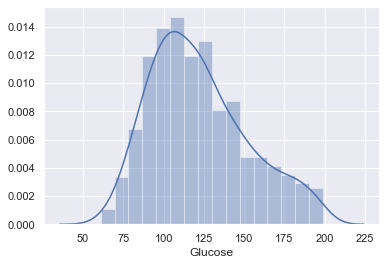

In [44]:
q = data['Glucose'].quantile(0.01)
data = data[data['Glucose'] > q]
sns.distplot(data['Glucose'])


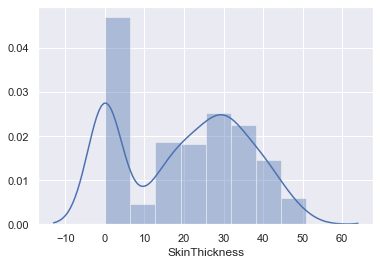

In [45]:
q = data['SkinThickness'].quantile(0.99)
data = data[data['SkinThickness'] < q]
sns.distplot(data['SkinThickness'])

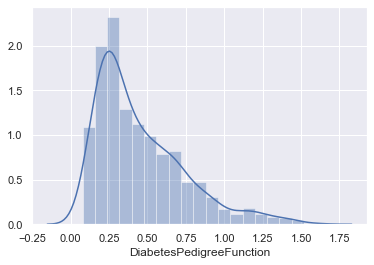

In [46]:
q = data['DiabetesPedigreeFunction'].quantile(0.99)
data = data[data['DiabetesPedigreeFunction'] < q]
sns.distplot(data['DiabetesPedigreeFunction'])

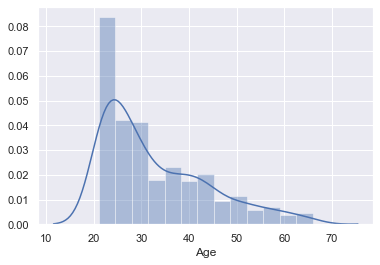

In [47]:
q = data['Age'].quantile(0.99)
data = data[data['Age'] < q]
sns.distplot(data['Age'])

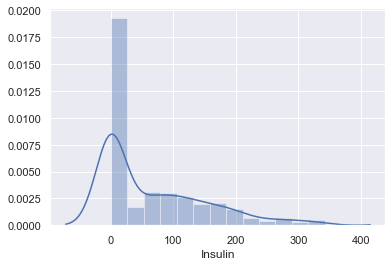

In [48]:
q = data['Insulin'].quantile(0.97)
data = data[data['Insulin'] < q]
sns.distplot(data['Insulin'])

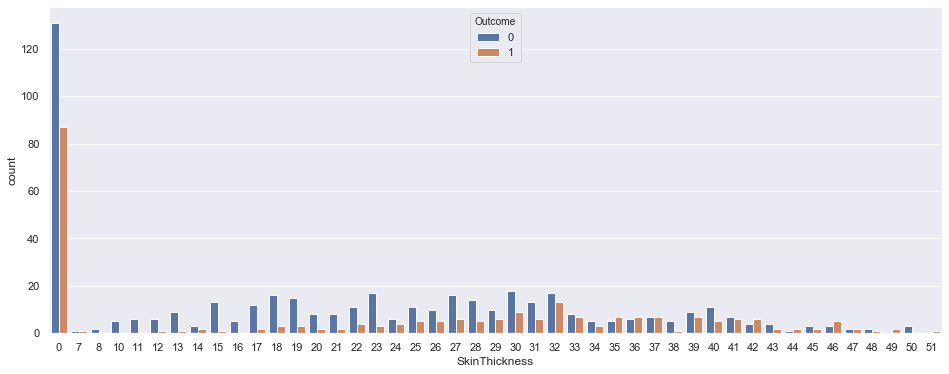

In [49]:
plt.figure(figsize=(16,6))

sns.countplot(data['SkinThickness'], hue = data['Outcome'])

In [50]:
age_range = ['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70']

In [51]:
data['age_i'] = pd.cut(data['Age'], range(20, 75, 5), right=False, labels=age_range )

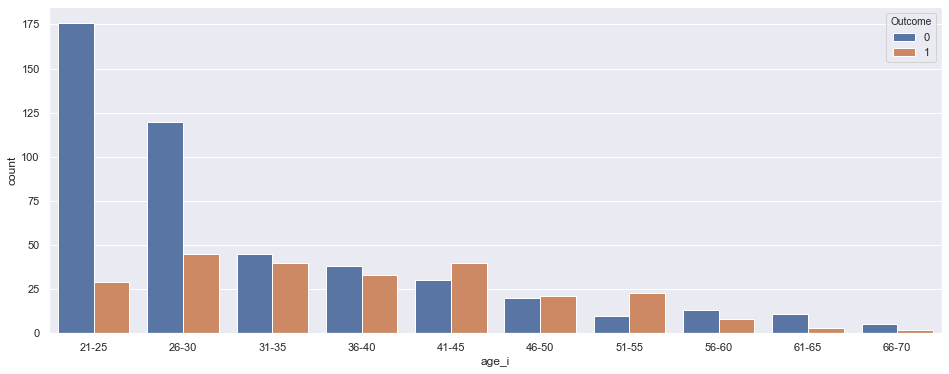

In [52]:
plt.figure(figsize=(16,6))
sns.countplot(x = data['age_i'], hue=data['Outcome'])

In [53]:
features = data.drop(['age_i','Outcome'],axis=1)
target = data['Outcome']

#### Feature Selection Using Univerant analysis

In [54]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression


select_univeriate = SelectKBest(f_regression, k=5).fit(features, target)

feature_mask = select_univeriate.get_support()

pd.DataFrame({'FeatureName': features.columns,
             'Score': select_univeriate.scores_}).sort_values(by='Score',
                                                            ascending=False)


uni_df = pd.DataFrame({'Univariate Method': features.columns[feature_mask]})

uni_df

,Univariate Method
0,Pregnancies
1,Glucose
2,BMI
3,DiabetesPedigreeFunction
4,Age


#### Feature Selection Using Recrsive Feature Elimination

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linear_regression = LinearRegression()

rfe = RFE(estimator = linear_regression,
         n_features_to_select = 5,
         step = 1)

rfe.fit(features,target)

rfe_features = features.columns[rfe.support_]

pd.DataFrame({'FeatureName' : features.columns, 
             'Rank': rfe.ranking_}).sort_values(by='Rank')

rfe_df = pd.DataFrame({'RFE Method': rfe_features})

rfe_df


,RFE Method
0,Pregnancies
1,Glucose
2,BloodPressure
3,BMI
4,DiabetesPedigreeFunction


In [56]:
#!pip install mlxtend --upgrade

In [57]:
#!pip install joblib --upgrade

#### Feature Selection Using Backwards Selection

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [59]:
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                            k_features=5,
                                            forward=False,
                                            scoring='neg_mean_squared_error',
                                            cv=4)

feature_filtered = feature_selector.fit(features, target)

backward_features = list(feature_filtered.k_feature_names_)
back_df = pd.DataFrame({'Backward Method': backward_features})

back_df

,Backward Method
0,Pregnancies
1,Glucose
2,BloodPressure
3,BMI
4,DiabetesPedigreeFunction


#### Feature Selection Using Forward Selection

In [60]:
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                            k_features=5,
                                            forward=True,
                                            scoring='neg_mean_squared_error',
                                            cv=4)

In [61]:
feature_filtered = feature_selector.fit(features, target)

forward_features = list(feature_filtered.k_feature_names_)
forw_df = pd.DataFrame({'Forward Method': forward_features})

forw_df

,Forward Method
0,Pregnancies
1,Glucose
2,BloodPressure
3,BMI
4,DiabetesPedigreeFunction


In [62]:
comp_selected_col = [uni_df, rfe_df, back_df,forw_df]

final_df = pd.concat(comp_selected_col, axis=1)

final_df

,Univariate Method,RFE Method,Backward Method,Forward Method
0,Pregnancies,Pregnancies,Pregnancies,Pregnancies
1,Glucose,Glucose,Glucose,Glucose
2,BMI,BloodPressure,BloodPressure,BloodPressure
3,DiabetesPedigreeFunction,BMI,BMI,BMI
4,Age,DiabetesPedigreeFunction,DiabetesPedigreeFunction,DiabetesPedigreeFunction


### Train Test Split

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
result = []

def best_score(names, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)
    
    logmodel = LogisticRegression(C=1000).fit(x_train,y_train)
    
    print(names)
   # print('Train score:', )

    predictions = logmodel.predict(x_test)
    
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))

In [70]:
best_score('Univariate', features[final_df['Univariate Method'].values], target)

Univariate
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       144
           1       0.74      0.56      0.63        70

    accuracy                           0.79       214
   macro avg       0.77      0.73      0.74       214
weighted avg       0.78      0.79      0.78       214

[[130  14]
 [ 31  39]]


C:\Users\Box\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
best_score('Recursive', features[final_df['RFE Method'].values], target)

Recursive
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       144
           1       0.75      0.60      0.67        70

    accuracy                           0.80       214
   macro avg       0.79      0.75      0.76       214
weighted avg       0.80      0.80      0.80       214

[[130  14]
 [ 28  42]]


C:\Users\Box\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Base Model

In [72]:
x1 = data.drop(['Outcome','age_i'],axis=1)
y1 = data['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, test_size=0.3, random_state=101)

lm = LogisticRegression()
lm.fit(X_train,Y_train)

predict = lm.predict(X_test)

print(classification_report(Y_test,predict))
print(confusion_matrix(Y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       144
           1       0.75      0.59      0.66        70

    accuracy                           0.80       214
   macro avg       0.78      0.74      0.76       214
weighted avg       0.79      0.80      0.79       214

[[130  14]
 [ 29  41]]


C:\Users\Box\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
from sklearn import metrics

metrics.accuracy_score(Y_test,predict)

0.8084112149532711